<a href="https://colab.research.google.com/github/TruongQuocHau110802/AI-subject/blob/main/nhan_dien_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_khuon_mat

/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_khuon_mat


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_khuon_mat/Train',target_size=(200,200), batch_size=32, class_mode='categorical')

Found 180 images belonging to 3 classes.


In [6]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_khuon_mat/Validation',target_size=(200,200), batch_size=32, class_mode='categorical')

Found 60 images belonging to 3 classes.


In [7]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Nguyen Anh Hao': 0, 'Nguyen Thi Tra Mi': 1, 'Truong Quoc Hau': 2}

In [8]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Nguyen Anh Hao': 0, 'Nguyen Thi Tra Mi': 1, 'Truong Quoc Hau': 2}

In [9]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(200,200,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [10]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
6/6 [==============================] - 148s 26s/step - loss: 18.4430 - accuracy: 0.3833 - val_loss: 0.9275 - val_accuracy: 0.6667
Epoch 2/100
6/6 [==============================] - 65s 11s/step - loss: 0.6358 - accuracy: 0.7167 - val_loss: 0.1242 - val_accuracy: 0.9667
Epoch 3/100
6/6 [==============================] - 66s 11s/step - loss: 0.2885 - accuracy: 0.8667 - val_loss: 0.0215 - val_accuracy: 0.9833
Epoch 4/100
6/6 [==============================] - 65s 11s/step - loss: 1.0118 - accuracy: 0.7333 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 5/100
6/6 [==============================] - 66s 11s/step - loss: 0.1135 - accuracy: 0.9500 - val_loss: 1.2349e-04 - val_accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 65s 10s/step - loss: 0.0429 - accuracy: 0.9833 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 63s 10s/step - loss: 0.1049 - accuracy: 0.9667 - val_loss: 1.7448e-05 - val_accuracy: 1.0000
Epoch 8/10

In [19]:
# Lưu lại
model.save("nhan_dien_khuon_mat.h5")

In [20]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_khuon_mat.h5')

In [21]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 1.218581928696949e-07
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

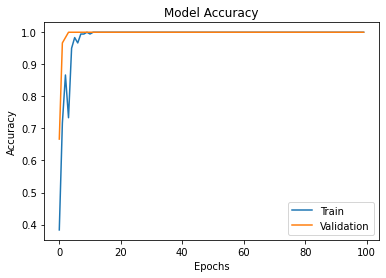

In [22]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FAA86D455D0>
1/1 [==============================] - 0s 102ms/step
Đây là: Nguyễn Thị Trà Mi
Chu thich: Du lieu nam trong Test1


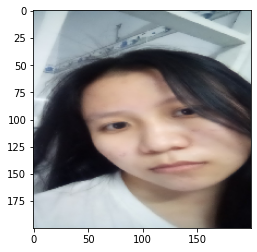

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FAA86E146D0>
1/1 [==============================] - 0s 90ms/step
Đây là: Trương Quốc Hậu
Chu thich: Du lieu nam trong Test1


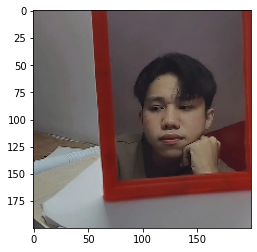

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FAA8D01C750>
1/1 [==============================] - 0s 95ms/step
Đây là: Nguyễn Anh Hào
Chu thich: Du lieu nam trong Test1


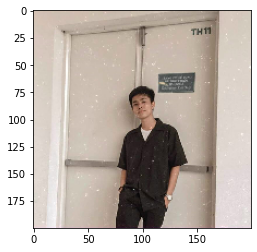

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FAB01A60E50>
1/1 [==============================] - 0s 101ms/step
Đây là: Trương Quốc Hậu
Chu thich: Du lieu nam trong Test2


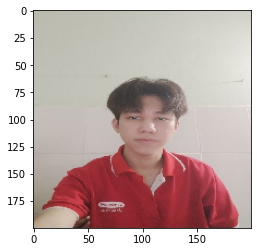

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FAA88357B50>
1/1 [==============================] - 0s 89ms/step
Đây là: Nguyễn Anh Hào
Chu thich: Du lieu nam trong Test2


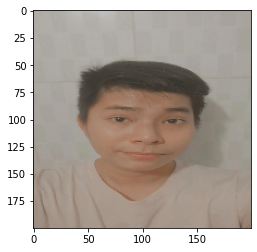

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FAA86ABF150>
1/1 [==============================] - 0s 90ms/step
Đây là: Nguyễn Thị Trà Mi
Chu thich: Du lieu nam trong Test2


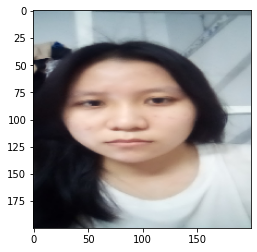

In [28]:
test1="/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_khuon_mat/Test/Test1"
test2="/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_khuon_mat/Test/Test2"
test = [test1, test2]
stt = 0
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(200,200))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='Nguyễn Anh Hào'
    if round(result[0][1])==1:
      prediction='Nguyễn Thị Trà Mi'
    if round(result[0][2])==1:
      prediction='Trương Quốc Hậu'
    print('Đây là:',prediction)
    print(f'Chu thich: Du lieu nam trong Test{stt}')
    plt.show()